In [38]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data = yf.download('BTC-USD','2015-01-01','2024-04-30')

[*********************100%%**********************]  1 of 1 completed


In [40]:
data = pd.DataFrame(data)

In [41]:
data.reset_index(inplace=True)

In [42]:
data.drop(columns = ['Date','Open','High','Low','Adj Close','Volume'], inplace=True)

In [43]:
data

,Close
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999
...,...
3402,64481.707031
3403,63755.320312
3404,63419.140625
3405,63113.230469


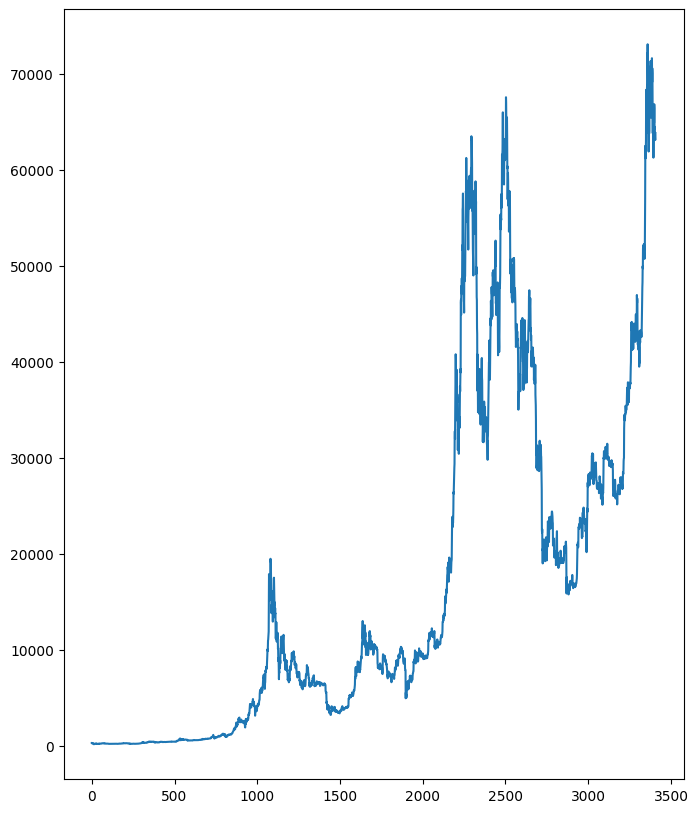

In [44]:
plt.figure(figsize=(8,10))
plt.plot(data)
plt.show()

In [45]:
train_data = data[:-100]
test_data = data[-100:]

In [46]:
train_data.shape

(3307, 1)

In [47]:
test_data.shape

(100, 1)

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [49]:
train_data_scale = scaler.fit_transform(train_data)

In [50]:
base_days = 100

In [51]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [52]:
x, y = np.array(x), np.array(y)

In [53]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [54]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [55]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [58]:
model.fit(x, y, epochs = 50, verbose =1 )

Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - loss: 0.0316
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - loss: 0.0056
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.0054
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.0041
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - loss: 0.0038
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.0036
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - loss: 0.0043
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.0038
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.0029
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 0.0035
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - loss: 0.0036
Epoch 12/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - loss: 0.0029
Epoch 13/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 0.0029
Epoch 14/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - loss: 0.0030
Epoch 15/50
101/101 ━━━━━━━━━

In [59]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [60]:
test_data

,Close
0,26862.375000
1,26861.707031
2,27159.652344
3,28519.466797
4,28415.748047
...,...
195,64481.707031
196,63755.320312
197,63419.140625
198,63113.230469


In [61]:
test_data_scale = scaler.transform(test_data)

In [62]:
x = []
y = [] 

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [63]:
x, y = np.array(x), np.array(y)

In [64]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [65]:
pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step


In [66]:
pred = scaler.inverse_transform(pred)

In [67]:
pred

array([[44875.52 ],
       [44820.09 ],
       [44511.266],
       [44023.36 ],
       [43542.45 ],
       [43168.168],
       [43178.66 ],
       [43586.086],
       [44177.453],
       [44883.45 ],
       [45501.04 ],
       [45855.984],
       [45997.62 ],
       [46016.996],
       [45952.37 ],
       [45795.492],
       [45603.74 ],
       [45493.04 ],
       [45657.754],
       [46181.69 ],
       [47108.03 ],
       [48248.383],
       [49364.445],
       [50437.582],
       [51310.09 ],
       [52151.312],
       [52909.67 ],
       [53503.23 ],
       [53798.547],
       [53899.004],
       [53848.04 ],
       [53808.273],
       [53773.12 ],
       [53681.957],
       [53489.504],
       [53390.098],
       [53456.4  ],
       [54013.96 ],
       [55163.39 ],
       [57128.344],
       [59034.973],
       [60525.04 ],
       [61413.25 ],
       [61957.14 ],
       [62898.95 ],
       [63367.14 ],
       [63690.594],
       [64018.332],
       [64507.29 ],
       [65017.258],


In [68]:
#future Bitcoin Price

In [69]:
m = y
z= []
future_days = 30
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

In [70]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [71]:
z

array([[62937.56307903],
       [62931.25688982],
       [62936.98467696],
       [62935.08077016],
       [62927.84271096],
       [62912.60342315],
       [62884.16532151],
       [62839.59622888],
       [62779.69948146],
       [62708.53192709],
       [62632.38368826],
       [62557.73768812],
       [62489.68707823],
       [62431.42913667],
       [62384.14476766],
       [62347.32786941],
       [62319.36373612],
       [62297.93072618],
       [62280.68309787],
       [62265.49201024],
       [62250.78292433],
       [62235.62397015],
       [62219.66167977],
       [62203.06475378],
       [62186.21076021],
       [62169.7022012 ],
       [62154.10141211],
       [62139.7939943 ],
       [62127.10931563],
       [62116.07147618]])